In [5]:
from collections import defaultdict

f = open("C:/Users/jbro0/OneDrive/Desktop/College_Stuff/PoCSVerse/Project/Github Stuff/Pocs_Film_Project/Data/movies-vs-tropes.csv")
tropes_dict = defaultdict(list)
for line in f:
    trope_string = line.split(";")[1] ### Find tropes associated with movie
    indiv_tropes = trope_string.split(",") ### Seperate into individual tropes
    movie = line.split(";")[0]
    for trope in indiv_tropes:
        tropes_dict[trope].append(movie)

f.close()

In [6]:
for trope in list(tropes_dict.keys()): ### Make values lists 
    movies = tropes_dict[trope]
    tropes_dict[trope] = movies
    

In [130]:
current_test_trope = "VasquezAlwaysDies"
alien_movies = tropes_dict[current_test_trope] ### Test a trope and find associated movies, including years and IMDB IDs
years = []
imdb_ids = []
things_not_found = []
for thing in alien_movies:
    year_found = False
    with open("C:/Users/jbro0/OneDrive/Desktop/College_Stuff/PoCSVerse/Project/Github Stuff/Pocs_Film_Project/Data/tropes_imdb_year.csv", "r") as file:
        for line in file:
            title = (line.split(",")[0]).replace(" ", "")
            if title == thing:
                
                if line.split(",")[-2] == "":
                    year_found = False
                else:
                    years.append(line.split(",")[-2]) 
                    imdb_ids.append(line.split(",")[-1])
                    year_found = True
    if year_found == False:
        print(thing + " not found.")
        things_not_found.append(thing)

found_movies = alien_movies.copy() ### Collect all movies plus years that work
for thing in found_movies:
    if thing in things_not_found:
        found_movies.remove(thing)
            

BlackChristmas1974 not found.
Annihilation2018 not found.
Leviathan1989 not found.
TwentyEightWeeksLater not found.
YoureNext not found.
ChoppingMall not found.


In [115]:
import letterboxdpy as lbd
from letterboxdpy import movie
scores = []
working_movies = alien_movies.copy()
working_years = years.copy()
for movie in alien_movies:
    print(movie)
    try:
        letterboxd_dict = lbd.movie.Movie(movie).__dict__
        letterboxd_rating = letterboxd_rating["rating"]
        score = letterboxd_rating.split(" ")[0]
        scores.append(score)
    except IndexError:
        print(str(movie) + " not available")
        working_movies.remove(movie)
        working_years.remove(years[alien_movies.index(movie)])
    except TypeError:
        print("Rating issue for " + str(movie))
        
print(scores)


ShockingDark
ShockingDark not available
Sharknado2TheSecondOne
Sharknado2TheSecondOne not available
TheDragonFighter
TheDragonFighter not available
SWAT
Rating issue for SWAT
AlienResurrection
AlienResurrection not available
Slither
Rating issue for Slither
BurningAmbition
BurningAmbition not available
TheReef
TheReef not available
StarshipTroopers3Marauder
StarshipTroopers3Marauder not available
Avatar
Rating issue for Avatar
BlackChristmas1974
BlackChristmas1974 not available
TheCollector
TheCollector not available
Leprechaun4InSpace
Leprechaun4InSpace not available
EscapeRoom
EscapeRoom not available
NewJackCity
NewJackCity not available
FastAndFurious6
FastAndFurious6 not available
ResidentEvilRetribution
ResidentEvilRetribution not available
MacheteKills
MacheteKills not available
AssaultOnPrecinct132005
AssaultOnPrecinct132005 not available
DeepRising
DeepRising not available
MoonZeroTwo
MoonZeroTwo not available
FastFive
FastFive not available
ANightmareOnElmStreet3DreamWarriors

IndexError: list index out of range

76
76


Text(0.5, 0, 'Years')

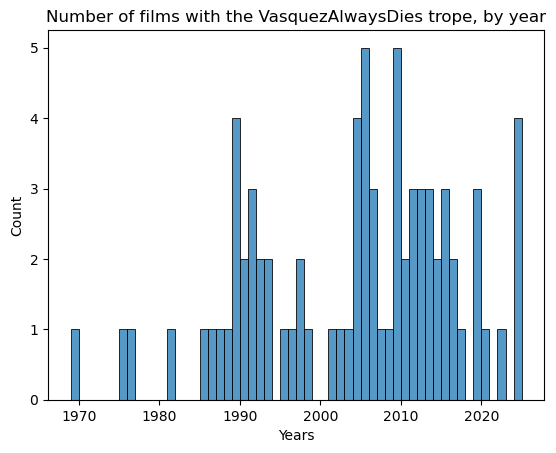

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
print(len(found_movies))
print(len(years))
int_years = [float(year) for year in years]
ax = sns.histplot(data = int_years, binwidth=1)
ax.set_title("Number of films with the " + current_test_trope + " trope, by year")
ax.set_xlabel("Years")


In [ ]:
tropes = list(tropes_dict.keys())
associated_movies = list(tropes_dict.values())
print(len(tropes))
print(len(associated_movies))

### What qualities of a movie can we predict based on it's tropes?





40689
40689


In [45]:
i = 0 
num_movies = []
while i <= len(tropes) - 1:
    length = len(associated_movies[i])
    num_movies.append(length)
    i += 1
ordered_list = num_movies.copy()
ordered_list.sort()
ordered_list.reverse()
print(ordered_list[0])
print(num_movies[0])
print(len(ordered_list))


3056
1
40689


In [46]:
tropes_to_check = []
i =0
while i <= 200:
    num = ordered_list[i]
    index = num_movies.index(num)
    tropes_to_check.append(tropes[index])
    i += 1
    

In [60]:
print(type(tropes_to_check))

<class 'list'>


In [61]:
import csv
with open("C:/Users/jbro0/OneDrive/Desktop/College_Stuff/PoCSVerse/Project/Github Stuff/Pocs_Film_Project/Data/tropemakers.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerow(tropes_to_check)

In [ ]:
### Vasquez Always Dies 

566


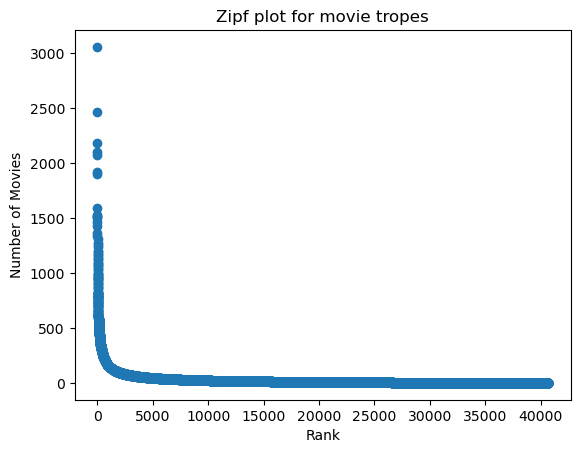

In [52]:
import matplotlib.pyplot as plt
plt.scatter(range(len(ordered_list)), ordered_list)
plt.xlabel("Rank")
plt.ylabel("Number of Movies")
plt.title("Zipf plot for movie tropes")
plt.show()

C:\Users\jbro0\AppData\Local\Temp\ipykernel_44776\608522278.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(range(len(ordered_list))), np.log10(ordered_list))


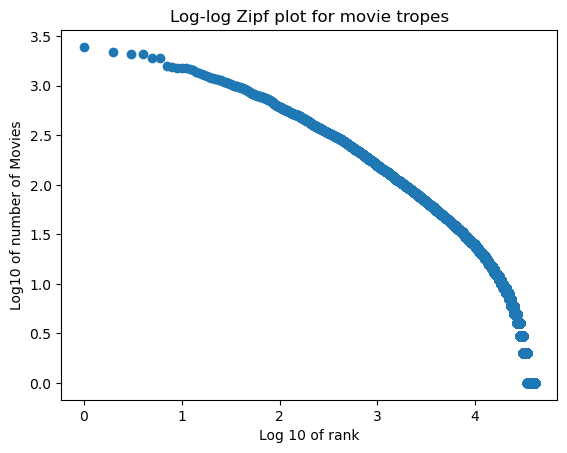

In [53]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(np.log10(range(len(ordered_list))), np.log10(ordered_list))
plt.xlabel("Log 10 of rank")
plt.ylabel("Log10 of number of Movies")
plt.title("Log-log Zipf plot for movie tropes")
plt.show()

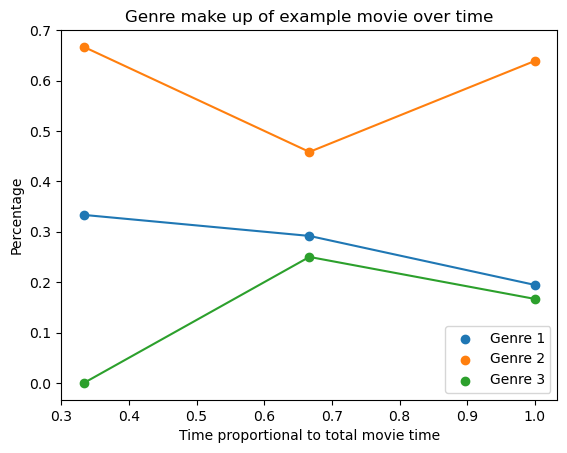

In [7]:
import matplotlib.pyplot as plt
genre_1 = [1/3, 7/24, 7/36]
genre_2 = [2/3, 11/24, 23/36]
genre_3 = [0, 6/24, 6/36]
time = [1/3,2/3,1]
plt.plot(time, genre_1)
plt.plot(time, genre_2)
plt.plot(time, genre_3)
plt.scatter(time, genre_1, label = "Genre 1")
plt.scatter(time, genre_2, label = "Genre 2")
plt.scatter(time, genre_3, label = "Genre 3")
plt.xlabel("Time proportional to total movie time")
plt.ylabel("Percentage")
plt.title("Genre make up of example movie over time")
plt.legend()
plt.show()